# Predicting loan cases using DecisionTree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("train_ctrUa4K.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset = dataset.sample(n=550, random_state = 65)

In [6]:
dataset.to_csv('EleanorOjoEmovon_2214865.csv')

In [7]:
data = pd.read_csv('EleanorOjoEmovon_2214865.csv')

In [8]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,56,LP001195,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,Semiurban,Y
1,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
2,509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
3,140,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
4,133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y


In [9]:
data=data.drop('Unnamed: 0', axis = 1)

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001195,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,Semiurban,Y
1,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
2,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
3,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
4,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y


In [11]:
print(data.describe())
print(data.size)
print(data.ndim)
print(data.shape)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       550.000000         550.000000  530.000000        536.000000   
mean       5462.747273        1657.150764  148.011321        341.820896   
std        6365.897670        3040.446785   89.060523         65.943148   
min         150.000000           0.000000    9.000000         12.000000   
25%        2873.500000           0.000000  100.000000        360.000000   
50%        3768.500000        1221.000000  127.500000        360.000000   
75%        5795.000000        2324.000000  169.500000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      505.000000  
mean         0.841584  
std          0.365493  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
7150
2
(550, 13)


Q1. This is my answer; 
- The count of the values of the loan amount, loan amount term and credit history are not up to 550 meaning there are some missing values we need to deal with during pre-processing.
-  As seen from above, there are some co-applicanats that do not have any income, and the applicants earn significantly more than the co-applicants.The average, minimum and maximum applicant income are  5463, 150 and 81000 respectively, with the average, minimum and maximum co-applicant income are 1657,0, and 41667 respectively.
-  The average, minimum and maximum LoanAmount are 148,9,and 700 respectively.
-  The credit history of the applicants range from 0-1 with a mean credit history of 0.84.
-  The average, minimum and maximum Loan amount term are 342,12 and 480 respectively.

- The data size is 7150
- The ndim (dimension) of the dataset is 2, meaning it is a 2-dimensional dataset
- The data shape is (550,13) which shows the number of rows and columns, the dataset has 550 rows and 13 columns.

Q2. This is my answer;
- Yes, there is a difference in the dimension of the original and new datasets.
- The original dataset is (614,13) and the new dataset is (550,13) because we took a portion of the dataset (n=550) for our data analysis.

In [12]:
data['Education'].value_counts()

Graduate        431
Not Graduate    119
Name: Education, dtype: int64

In [13]:
data['Education'].nunique()

2

Q3. This is my answer;
- Education has 2 possible values.
- They are either graduates(431) or not graduates(119).

## Data Analysis

In [14]:
columns = data.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001195,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,Semiurban,Y
1,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
2,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
3,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
4,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y


<AxesSubplot:>

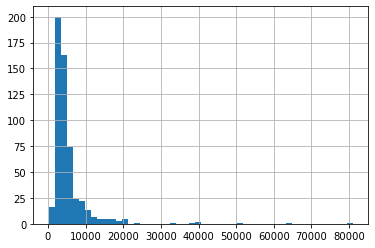

In [16]:
data['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

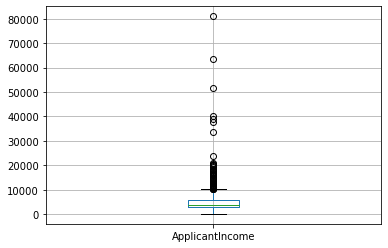

In [17]:
data.boxplot(column='ApplicantIncome')

Q4. This is my answer;
- It can be seen from the histogram that the data is left skewed and the applicants income is towards the left which may be due to a handfull of applicants earning almost the same income applying for high loans due to some needs.
 The histogram does not have a normal distribution and needs to be normalised(pre-processing) before being used.
- It can be seen from the boxplot that there are quite a lot of outliers and can be ascribed by the variance in applicant income.

- 4a. Extreme values are the maximum or minimum point of the dataset(boxplot), and values beyond extreme values are considered as outliers, they usually represent unusual patterns.
- The extreme values are found from 0 till 10,000 using "Applicant Income" as case study, and outliers appear up until 80,000. 

- 4b. Both plots represent the same data but the data is better represented by the boxplot because of the outliers.



<AxesSubplot:>

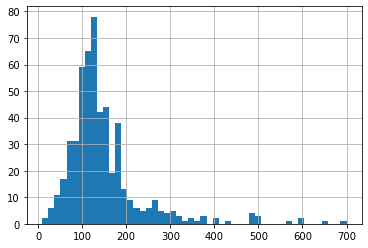

In [18]:
data['LoanAmount'].hist(bins=50)

<AxesSubplot:>

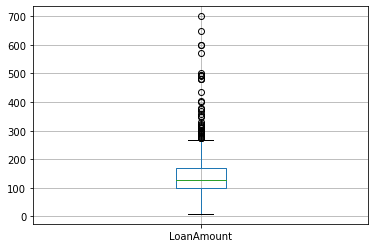

In [19]:
data.boxplot(column='LoanAmount')

- It can be seen that this is fairly symmetrical about the mean forming a fairly normal distribution but it has a lot of outliers.

## Categorical variable analysis

In [20]:
data['Credit_History'].value_counts()

1.0    425
0.0     80
Name: Credit_History, dtype: int64

In [21]:
credit_history = data['Credit_History'].value_counts(ascending=True)
 
loan_probability = data.pivot_table(values='Loan_Status', index=['Credit_History'],
                       aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
 
print('Frequency Table for Credit History:')
print(credit_history)
print('\nProbability of getting loan for each Credit History class:')
print(loan_probability)

Frequency Table for Credit History:
0.0     80
1.0    425
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.087500
1.0                0.792941


In [22]:
data['Loan_Status'].value_counts()

Y    377
N    173
Name: Loan_Status, dtype: int64

In [23]:
data.shape

(550, 13)

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001195,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,Semiurban,Y
1,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
2,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
3,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
4,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y


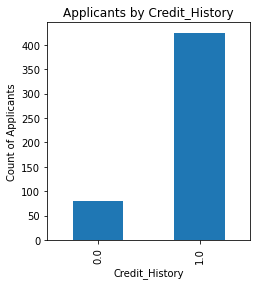

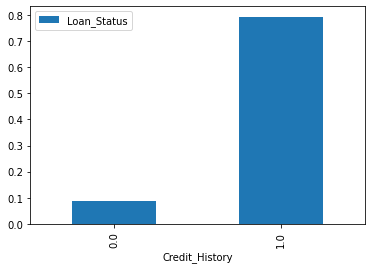

In [25]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
credit_history.plot(kind='bar')
plt.show()
 
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
loan_probability.plot(kind = 'bar')
plt.show()

## Data Pre-processing

In [26]:
data['Gender'].value_counts()

Male      436
Female    102
Name: Gender, dtype: int64

### Filling in missing values by mean

In [27]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Credit_History       45
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001195,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,Semiurban,Y
1,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
2,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
3,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
4,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y


In [29]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

In [30]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001195,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,Semiurban,Y
1,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
2,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
3,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
4,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y


In [31]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       45
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
data.shape

(550, 13)

In [33]:
data.to_csv('new_train.csv')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='[Education, Self_Employed]'>

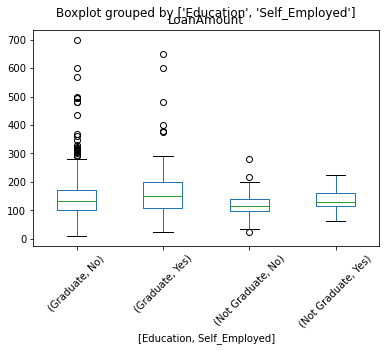

In [34]:
data.boxplot(column='LoanAmount', by = ['Education','Self_Employed'],
             grid=False, rot = 45, fontsize = 10)

### Impute the values

In [35]:
data['Self_Employed'].value_counts()

No     447
Yes     72
Name: Self_Employed, dtype: int64

In [36]:
data['Self_Employed'].fillna('No', inplace=True)

In [37]:
data['Self_Employed'].value_counts()

No     478
Yes     72
Name: Self_Employed, dtype: int64

In [38]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       45
Property_Area         0
Loan_Status           0
dtype: int64

### Dealing with outliers

In [39]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,550.000000,536.000000,505.000000
mean,5462.747273,1657.150764,148.011321,341.820896,0.841584
std,6365.897670,3040.446785,87.423242,65.943148,0.365493
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2873.500000,0.000000,100.000000,360.000000,1.000000
50%,3768.500000,1221.000000,128.000000,360.000000,1.000000
75%,5795.000000,2324.000000,165.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


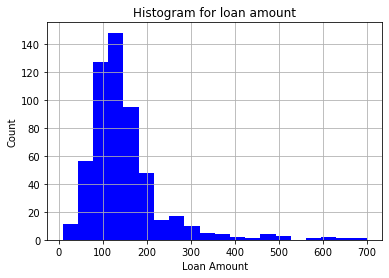

In [40]:
plt.hist(data['LoanAmount'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<AxesSubplot:>

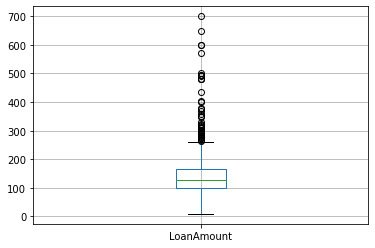

In [41]:
data.boxplot(column='LoanAmount')

In [42]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
#data['LoanAmount_log'].hist(bins = 20)

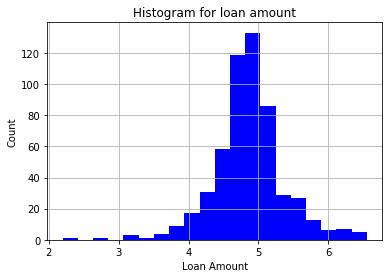

In [43]:
plt.hist(data['LoanAmount_log'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<AxesSubplot:>

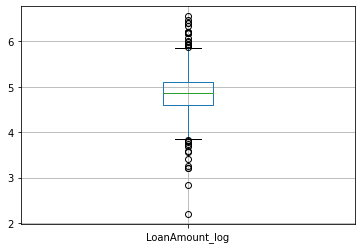

In [44]:
data.boxplot(column='LoanAmount_log')

In [45]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001195,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,Semiurban,Y,4.564348
1,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680
2,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y,3.688879
3,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N,5.220356
4,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y,3.218876


In [46]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log
count,550.000000,550.000000,550.000000,536.000000,505.000000,550.000000
mean,5462.747273,1657.150764,148.011321,341.820896,0.841584,4.866440
std,6365.897670,3040.446785,87.423242,65.943148,0.365493,0.507976
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225
25%,2873.500000,0.000000,100.000000,360.000000,1.000000,4.605170
50%,3768.500000,1221.000000,128.000000,360.000000,1.000000,4.852030
75%,5795.000000,2324.000000,165.750000,360.000000,1.000000,5.110477
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080


In [47]:
data = data.drop(['LoanAmount'], axis=1)

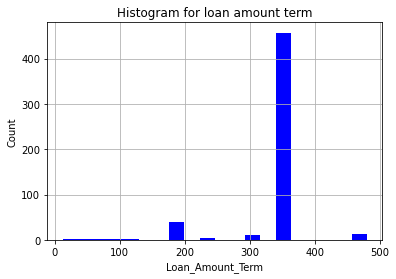

In [48]:
plt.hist(data['Loan_Amount_Term'], 20, facecolor='b')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Count')
plt.title('Histogram for loan amount term')
plt.grid(True)
plt.show()

<AxesSubplot:>

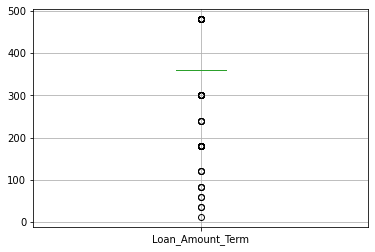

In [49]:
data.boxplot(column='Loan_Amount_Term')

In [50]:
data['Loan_Amount_Term_log'] = np.log(data['Loan_Amount_Term'])

<AxesSubplot:>

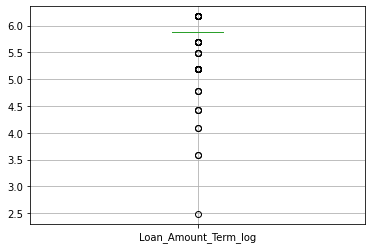

In [51]:
data.boxplot(column='Loan_Amount_Term_log')

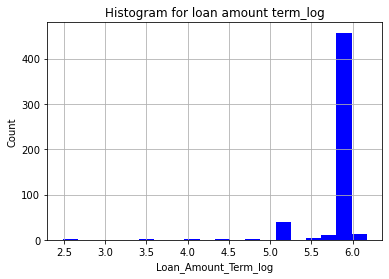

In [52]:
plt.hist(data['Loan_Amount_Term_log'], 20, facecolor='b')
plt.xlabel('Loan_Amount_Term_log')
plt.ylabel('Count')
plt.title('Histogram for loan amount term_log')
plt.grid(True)
plt.show()

In [53]:
data["TotalIncome"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

In [54]:
data[["TotalIncome"]].head()

,TotalIncome
0,3723.0
1,2900.0
2,13262.0
3,7125.0
4,3459.0


<AxesSubplot:>

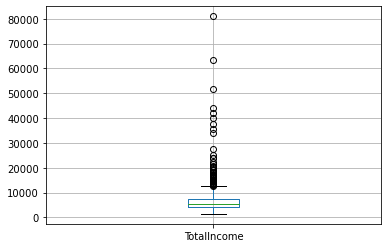

In [55]:
data.boxplot(column='TotalIncome')

array([[<AxesSubplot:title={'center':'TotalIncome'}>]], dtype=object)

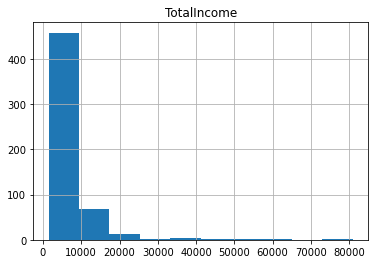

In [56]:
data.hist(column = 'TotalIncome')

In [57]:
data['TotalIncome_log'] = np.log(data['TotalIncome'])

<AxesSubplot:>

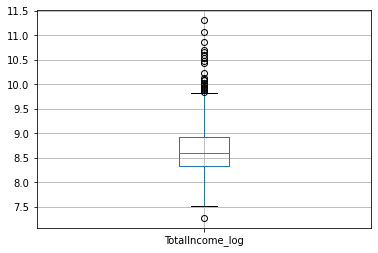

In [58]:
data.boxplot(column='TotalIncome_log')

array([[<AxesSubplot:title={'center':'TotalIncome_log'}>]], dtype=object)

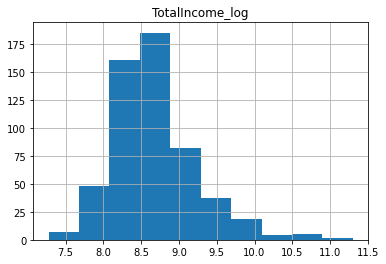

In [59]:
data.hist(column = 'TotalIncome_log')

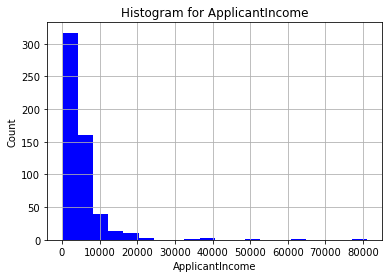

In [60]:
plt.hist(data['ApplicantIncome'], 20, facecolor='b')
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.title('Histogram for ApplicantIncome')
plt.grid(True)
plt.show()

<AxesSubplot:>

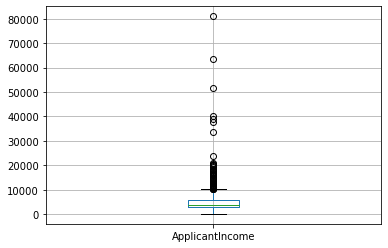

In [61]:
data.boxplot(column='ApplicantIncome')

In [62]:
data['ApplicantIncome_log'] = np.log(data['ApplicantIncome'])

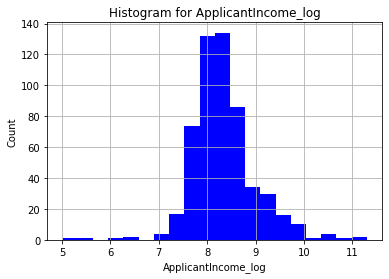

In [63]:
plt.hist(data['ApplicantIncome_log'], 20, facecolor='b')
plt.xlabel('ApplicantIncome_log')
plt.ylabel('Count')
plt.title('Histogram for ApplicantIncome_log')
plt.grid(True)
plt.show()

<AxesSubplot:>

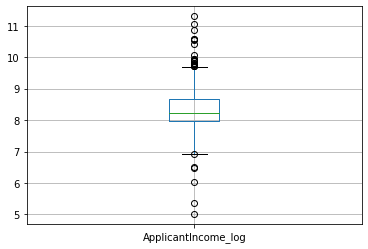

In [64]:
data.boxplot(column='ApplicantIncome_log')

In [65]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Loan_Amount_Term_log,TotalIncome,TotalIncome_log,ApplicantIncome_log
0,LP001195,Male,Yes,0,Graduate,No,2132,1591.0,360.0,1.0,Semiurban,Y,4.564348,5.886104,3723.0,8.222285,7.664816
1,LP002978,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,Y,4.262680,5.886104,2900.0,7.972466,7.972466
2,LP002634,Female,No,1,Graduate,No,13262,0.0,360.0,1.0,Urban,Y,3.688879,5.886104,13262.0,9.492658,9.492658
3,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,360.0,1.0,Rural,N,5.220356,5.886104,7125.0,8.871365,8.525558
4,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,120.0,1.0,Semiurban,Y,3.218876,4.787492,3459.0,8.148735,8.148735


### Missing values continuous

In [66]:
#0:gets the mode of each column, 1: for each row
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [67]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
LoanAmount_log           0
Loan_Amount_Term_log    14
TotalIncome              0
TotalIncome_log          0
ApplicantIncome_log      0
dtype: int64

In [68]:
data.dtypes

Loan_ID                  object
Gender                   object
Married                  object
Dependents               object
Education                object
Self_Employed            object
ApplicantIncome           int64
CoapplicantIncome       float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area            object
Loan_Status              object
LoanAmount_log          float64
Loan_Amount_Term_log    float64
TotalIncome             float64
TotalIncome_log         float64
ApplicantIncome_log     float64
dtype: object

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
columns = list(data) 
print(columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_log', 'Loan_Amount_Term_log', 'TotalIncome', 'TotalIncome_log', 'ApplicantIncome_log']


In [71]:
data.shape

(550, 17)

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Loan_Amount_Term_log,TotalIncome,TotalIncome_log,ApplicantIncome_log
0,LP001195,Male,Yes,0,Graduate,No,2132,1591.0,360.0,1.0,Semiurban,Y,4.564348,5.886104,3723.0,8.222285,7.664816
1,LP002978,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,Y,4.262680,5.886104,2900.0,7.972466,7.972466
2,LP002634,Female,No,1,Graduate,No,13262,0.0,360.0,1.0,Urban,Y,3.688879,5.886104,13262.0,9.492658,9.492658
3,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,360.0,1.0,Rural,N,5.220356,5.886104,7125.0,8.871365,8.525558
4,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,120.0,1.0,Semiurban,Y,3.218876,4.787492,3459.0,8.148735,8.148735


In [73]:
data.dtypes

Loan_ID                  object
Gender                   object
Married                  object
Dependents               object
Education                object
Self_Employed            object
ApplicantIncome           int64
CoapplicantIncome       float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area            object
Loan_Status              object
LoanAmount_log          float64
Loan_Amount_Term_log    float64
TotalIncome             float64
TotalIncome_log         float64
ApplicantIncome_log     float64
dtype: object

In [74]:
columns = list(data.select_dtypes(exclude=['float64','int64']))

In [75]:
columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [76]:
le = LabelEncoder()
for i in columns:
    #print(i)
    data[i] = le.fit_transform(data[i])

In [77]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Loan_Amount_Term_log,TotalIncome,TotalIncome_log,ApplicantIncome_log
0,52,1,1,0,0,0,2132,1591.0,360.0,1.0,1,1,4.564348,5.886104,3723.0,8.222285,7.664816
1,545,0,0,0,0,0,2900,0.0,360.0,1.0,0,1,4.262680,5.886104,2900.0,7.972466,7.972466
2,449,0,0,1,0,0,13262,0.0,360.0,1.0,2,1,3.688879,5.886104,13262.0,9.492658,9.492658
3,125,1,1,2,0,0,5042,2083.0,360.0,1.0,0,0,5.220356,5.886104,7125.0,8.871365,8.525558
4,120,1,1,0,0,1,3459,0.0,120.0,1.0,1,1,3.218876,4.787492,3459.0,8.148735,8.148735


In [78]:
data = data.drop(['TotalIncome_log','ApplicantIncome_log','Loan_Amount_Term_log'], axis=1) 

### Data Normalisation

In [79]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [80]:
original_data = data.copy()
original_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,52,1,1,0,0,0,2132,1591.0,360.0,1.0,1,1,4.564348,3723.0
1,545,0,0,0,0,0,2900,0.0,360.0,1.0,0,1,4.262680,2900.0
2,449,0,0,1,0,0,13262,0.0,360.0,1.0,2,1,3.688879,13262.0
3,125,1,1,2,0,0,5042,2083.0,360.0,1.0,0,0,5.220356,7125.0
4,120,1,1,0,0,1,3459,0.0,120.0,1.0,1,1,3.218876,3459.0


In [81]:
original_data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,52,1,1,0,0,0,2132,1591.0,360.0,1.0,1,1,4.564348,3723.0
1,545,0,0,0,0,0,2900,0.0,360.0,1.0,0,1,4.262680,2900.0
2,449,0,0,1,0,0,13262,0.0,360.0,1.0,2,1,3.688879,13262.0
3,125,1,1,2,0,0,5042,2083.0,360.0,1.0,0,0,5.220356,7125.0
4,120,1,1,0,0,1,3459,0.0,120.0,1.0,1,1,3.218876,3459.0


In [82]:
data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,52,1,1,0,0,0,2132,1591.0,360.0,1.0,1,1,4.564348,3723.0
1,545,0,0,0,0,0,2900,0.0,360.0,1.0,0,1,4.262680,2900.0
2,449,0,0,1,0,0,13262,0.0,360.0,1.0,2,1,3.688879,13262.0
3,125,1,1,2,0,0,5042,2083.0,360.0,1.0,0,0,5.220356,7125.0
4,120,1,1,0,0,1,3459,0.0,120.0,1.0,1,1,3.218876,3459.0


In [83]:
data_for_norm = data.drop(['Loan_ID','Loan_Status'], axis=1)

In [84]:
normalized_data = normalize(data_for_norm)

In [85]:
print(normalized_data[0:5])

[[2.17870307e-04 2.17870307e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.64499495e-01 3.46631659e-01 7.84333106e-02
  2.17870307e-04 2.17870307e-04 9.94435943e-04 8.11131154e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.04397856e-01 0.00000000e+00 8.74424925e-02
  2.42895812e-04 0.00000000e+00 1.03538709e-03 7.04397856e-01]
 [0.00000000e+00 0.00000000e+00 5.33084404e-05 0.00000000e+00
  0.00000000e+00 7.06976537e-01 0.00000000e+00 1.91910386e-02
  5.33084404e-05 1.06616881e-04 1.96648411e-04 7.06976537e-01]
 [1.11347866e-04 1.11347866e-04 2.22695731e-04 0.00000000e+00
  0.00000000e+00 5.61415938e-01 2.31937604e-01 4.00852316e-02
  1.11347866e-04 0.00000000e+00 5.81275478e-04 7.93353542e-01]
 [2.04363658e-04 2.04363658e-04 0.00000000e+00 0.00000000e+00
  2.04363658e-04 7.06893892e-01 0.00000000e+00 2.45236389e-02
  2.04363658e-04 2.04363658e-04 6.57821237e-04 7.06893892e-01]]


In [86]:
normalized_data = normalize( data_for_norm )

In [87]:
print(normalized_data[0:5])

[[2.17870307e-04 2.17870307e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.64499495e-01 3.46631659e-01 7.84333106e-02
  2.17870307e-04 2.17870307e-04 9.94435943e-04 8.11131154e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.04397856e-01 0.00000000e+00 8.74424925e-02
  2.42895812e-04 0.00000000e+00 1.03538709e-03 7.04397856e-01]
 [0.00000000e+00 0.00000000e+00 5.33084404e-05 0.00000000e+00
  0.00000000e+00 7.06976537e-01 0.00000000e+00 1.91910386e-02
  5.33084404e-05 1.06616881e-04 1.96648411e-04 7.06976537e-01]
 [1.11347866e-04 1.11347866e-04 2.22695731e-04 0.00000000e+00
  0.00000000e+00 5.61415938e-01 2.31937604e-01 4.00852316e-02
  1.11347866e-04 0.00000000e+00 5.81275478e-04 7.93353542e-01]
 [2.04363658e-04 2.04363658e-04 0.00000000e+00 0.00000000e+00
  2.04363658e-04 7.06893892e-01 0.00000000e+00 2.45236389e-02
  2.04363658e-04 2.04363658e-04 6.57821237e-04 7.06893892e-01]]


In [88]:
normalized_data.shape

(550, 12)

In [89]:
data.shape

(550, 14)

In [90]:
normalized_data = pd.DataFrame(normalized_data, columns=data_for_norm.columns)

In [91]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome
0,0.000218,0.000218,0.000000,0.0,0.000000,0.464499,0.346632,0.078433,0.000218,0.000218,0.000994,0.811131
1,0.000000,0.000000,0.000000,0.0,0.000000,0.704398,0.000000,0.087442,0.000243,0.000000,0.001035,0.704398
2,0.000000,0.000000,0.000053,0.0,0.000000,0.706977,0.000000,0.019191,0.000053,0.000107,0.000197,0.706977
3,0.000111,0.000111,0.000223,0.0,0.000000,0.561416,0.231938,0.040085,0.000111,0.000000,0.000581,0.793354
4,0.000204,0.000204,0.000000,0.0,0.000204,0.706894,0.000000,0.024524,0.000204,0.000204,0.000658,0.706894


In [92]:
normalized_data['Loan_ID'] = data['Loan_ID'] 

In [93]:
normalized_data['Loan_Status'] = data['Loan_Status']

In [94]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,Loan_ID,Loan_Status
0,0.000218,0.000218,0.000000,0.0,0.000000,0.464499,0.346632,0.078433,0.000218,0.000218,0.000994,0.811131,52,1
1,0.000000,0.000000,0.000000,0.0,0.000000,0.704398,0.000000,0.087442,0.000243,0.000000,0.001035,0.704398,545,1
2,0.000000,0.000000,0.000053,0.0,0.000000,0.706977,0.000000,0.019191,0.000053,0.000107,0.000197,0.706977,449,1
3,0.000111,0.000111,0.000223,0.0,0.000000,0.561416,0.231938,0.040085,0.000111,0.000000,0.000581,0.793354,125,0
4,0.000204,0.000204,0.000000,0.0,0.000204,0.706894,0.000000,0.024524,0.000204,0.000204,0.000658,0.706894,120,1


In [95]:
normalized_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,Loan_ID,Loan_Status
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,0.000115,0.000088,0.000101,0.000037,0.000015,0.573475,0.183567,0.050516,0.000125,0.000157,0.000692,0.757042,274.500000,0.685455
std,0.000080,0.000082,0.000159,0.000077,0.000045,0.150003,0.190555,0.026100,0.000081,0.000154,0.000282,0.048831,158.915596,0.464757
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.007024,0.000000,0.001298,0.000000,0.000000,0.000051,0.696338,0.000000,0.000000
25%,0.000059,0.000000,0.000000,0.000000,0.000000,0.465925,0.000000,0.031542,0.000071,0.000000,0.000508,0.706443,137.250000,0.000000
50%,0.000119,0.000089,0.000000,0.000000,0.000000,0.613682,0.158487,0.049439,0.000128,0.000139,0.000679,0.763427,274.500000,1.000000
75%,0.000167,0.000151,0.000176,0.000000,0.000000,0.706069,0.345619,0.064689,0.000177,0.000236,0.000854,0.809473,411.750000,1.000000
max,0.000483,0.000373,0.001148,0.000483,0.000323,0.707105,0.703565,0.173843,0.000483,0.000966,0.001913,0.816215,549.000000,1.000000


<AxesSubplot:>

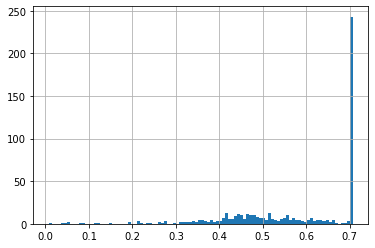

In [96]:
normalized_data['ApplicantIncome'].hist(bins=100)

## Building a Decision Tree classifier using sklearn

In [97]:
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay
# import pydotplus

In [98]:
columns = list(normalized_data.columns) 
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'TotalIncome',
 'Loan_ID',
 'Loan_Status']

In [99]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,Loan_ID,Loan_Status
0,0.000218,0.000218,0.000000,0.0,0.000000,0.464499,0.346632,0.078433,0.000218,0.000218,0.000994,0.811131,52,1
1,0.000000,0.000000,0.000000,0.0,0.000000,0.704398,0.000000,0.087442,0.000243,0.000000,0.001035,0.704398,545,1
2,0.000000,0.000000,0.000053,0.0,0.000000,0.706977,0.000000,0.019191,0.000053,0.000107,0.000197,0.706977,449,1
3,0.000111,0.000111,0.000223,0.0,0.000000,0.561416,0.231938,0.040085,0.000111,0.000000,0.000581,0.793354,125,0
4,0.000204,0.000204,0.000000,0.0,0.000204,0.706894,0.000000,0.024524,0.000204,0.000204,0.000658,0.706894,120,1


In [100]:
features = normalized_data.drop(['Loan_ID','Loan_Status'], axis = 1)
 
classes = pd.DataFrame(normalized_data['Loan_Status'])

In [101]:
print('Features:')
print(features.head())
 
print('Classes:')
print(classes.head())

Features:
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.000218  0.000218    0.000000        0.0       0.000000         0.464499   
1  0.000000  0.000000    0.000000        0.0       0.000000         0.704398   
2  0.000000  0.000000    0.000053        0.0       0.000000         0.706977   
3  0.000111  0.000111    0.000223        0.0       0.000000         0.561416   
4  0.000204  0.000204    0.000000        0.0       0.000204         0.706894   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0           0.346632          0.078433        0.000218       0.000218   
1           0.000000          0.087442        0.000243       0.000000   
2           0.000000          0.019191        0.000053       0.000107   
3           0.231938          0.040085        0.000111       0.000000   
4           0.000000          0.024524        0.000204       0.000204   

   LoanAmount_log  TotalIncome  
0        0.000994     0.811131  
1   

In [102]:
normalized_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,Loan_ID,Loan_Status
0,0.000218,0.000218,0.000000,0.0,0.000000,0.464499,0.346632,0.078433,0.000218,0.000218,0.000994,0.811131,52,1
1,0.000000,0.000000,0.000000,0.0,0.000000,0.704398,0.000000,0.087442,0.000243,0.000000,0.001035,0.704398,545,1
2,0.000000,0.000000,0.000053,0.0,0.000000,0.706977,0.000000,0.019191,0.000053,0.000107,0.000197,0.706977,449,1
3,0.000111,0.000111,0.000223,0.0,0.000000,0.561416,0.231938,0.040085,0.000111,0.000000,0.000581,0.793354,125,0
4,0.000204,0.000204,0.000000,0.0,0.000204,0.706894,0.000000,0.024524,0.000204,0.000204,0.000658,0.706894,120,1
5,0.000190,0.000190,0.000380,0.0,0.000000,0.705454,0.000000,0.068325,0.000190,0.000190,0.000909,0.705454,284,1
6,0.000087,0.000087,0.000000,0.0,0.000000,0.658758,0.087800,0.031295,0.000087,0.000087,0.000449,0.746558,199,1
7,0.000000,0.000000,0.000000,0.0,0.000000,0.705144,0.000000,0.074443,0.000207,0.000414,0.000926,0.705144,43,1
8,0.000073,0.000073,0.000146,0.0,0.000000,0.706864,0.000000,0.026226,0.000073,0.000146,0.000344,0.706864,221,1
9,0.000075,0.000075,0.000075,0.0,0.000000,0.607009,0.169031,0.027045,0.000075,0.000150,0.000390,0.776040,54,1


In [103]:
normalized_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,Loan_ID,Loan_Status
0,0.000218,0.000218,0.000000,0.0,0.000000,0.464499,0.346632,0.078433,0.000218,0.000218,0.000994,0.811131,52,1
1,0.000000,0.000000,0.000000,0.0,0.000000,0.704398,0.000000,0.087442,0.000243,0.000000,0.001035,0.704398,545,1
2,0.000000,0.000000,0.000053,0.0,0.000000,0.706977,0.000000,0.019191,0.000053,0.000107,0.000197,0.706977,449,1
3,0.000111,0.000111,0.000223,0.0,0.000000,0.561416,0.231938,0.040085,0.000111,0.000000,0.000581,0.793354,125,0
4,0.000204,0.000204,0.000000,0.0,0.000204,0.706894,0.000000,0.024524,0.000204,0.000204,0.000658,0.706894,120,1
5,0.000190,0.000190,0.000380,0.0,0.000000,0.705454,0.000000,0.068325,0.000190,0.000190,0.000909,0.705454,284,1
6,0.000087,0.000087,0.000000,0.0,0.000000,0.658758,0.087800,0.031295,0.000087,0.000087,0.000449,0.746558,199,1
7,0.000000,0.000000,0.000000,0.0,0.000000,0.705144,0.000000,0.074443,0.000207,0.000414,0.000926,0.705144,43,1
8,0.000073,0.000073,0.000146,0.0,0.000000,0.706864,0.000000,0.026226,0.000073,0.000146,0.000344,0.706864,221,1
9,0.000075,0.000075,0.000075,0.0,0.000000,0.607009,0.169031,0.027045,0.000075,0.000150,0.000390,0.776040,54,1


## Building our first baseline model using all the features.
Partitioning data into Train and Test sets:

In [104]:
normalized_data.shape

(550, 14)

In [105]:
from matplotlib import pyplot

In [106]:
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size= .33, 
                                                    random_state = 65)
 
print(x_train.shape, x_test.shape)

(368, 12) (182, 12)


In [107]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [108]:
dtc_model = decisionTree.fit(x_train, y_train)

Feature: 0, Score: 0.07117
Feature: 1, Score: 0.07433
Feature: 2, Score: 0.02489
Feature: 3, Score: 0.04415
Feature: 4, Score: 0.04019
Feature: 5, Score: 0.04556
Feature: 6, Score: 0.03844
Feature: 7, Score: 0.11437
Feature: 8, Score: 0.23617
Feature: 9, Score: 0.06984
Feature: 10, Score: 0.16509
Feature: 11, Score: 0.07580


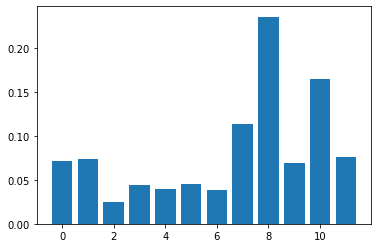

In [109]:
# feature importance
importance = dtc_model.feature_importances_
 
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
 
# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [110]:
prediction = dtc_model.predict(x_test) 

In [111]:
y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

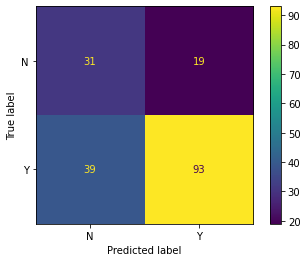

In [112]:
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [113]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.44      0.62      0.52        50
           Y       0.83      0.70      0.76       132

    accuracy                           0.68       182
   macro avg       0.64      0.66      0.64       182
weighted avg       0.72      0.68      0.69       182



## Visualising the decision tree

In [114]:
graphviz_path = 'C:/Program Files/Graphviz'

In [115]:
import os
 
os.environ["PATH"] += os.pathsep + graphviz_path

In [116]:
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(dtc_model, out_file=None, feature_names=features.columns,filled=True))

In [ ]:
pip install graphviz

In [ ]:
pip install cairosvg

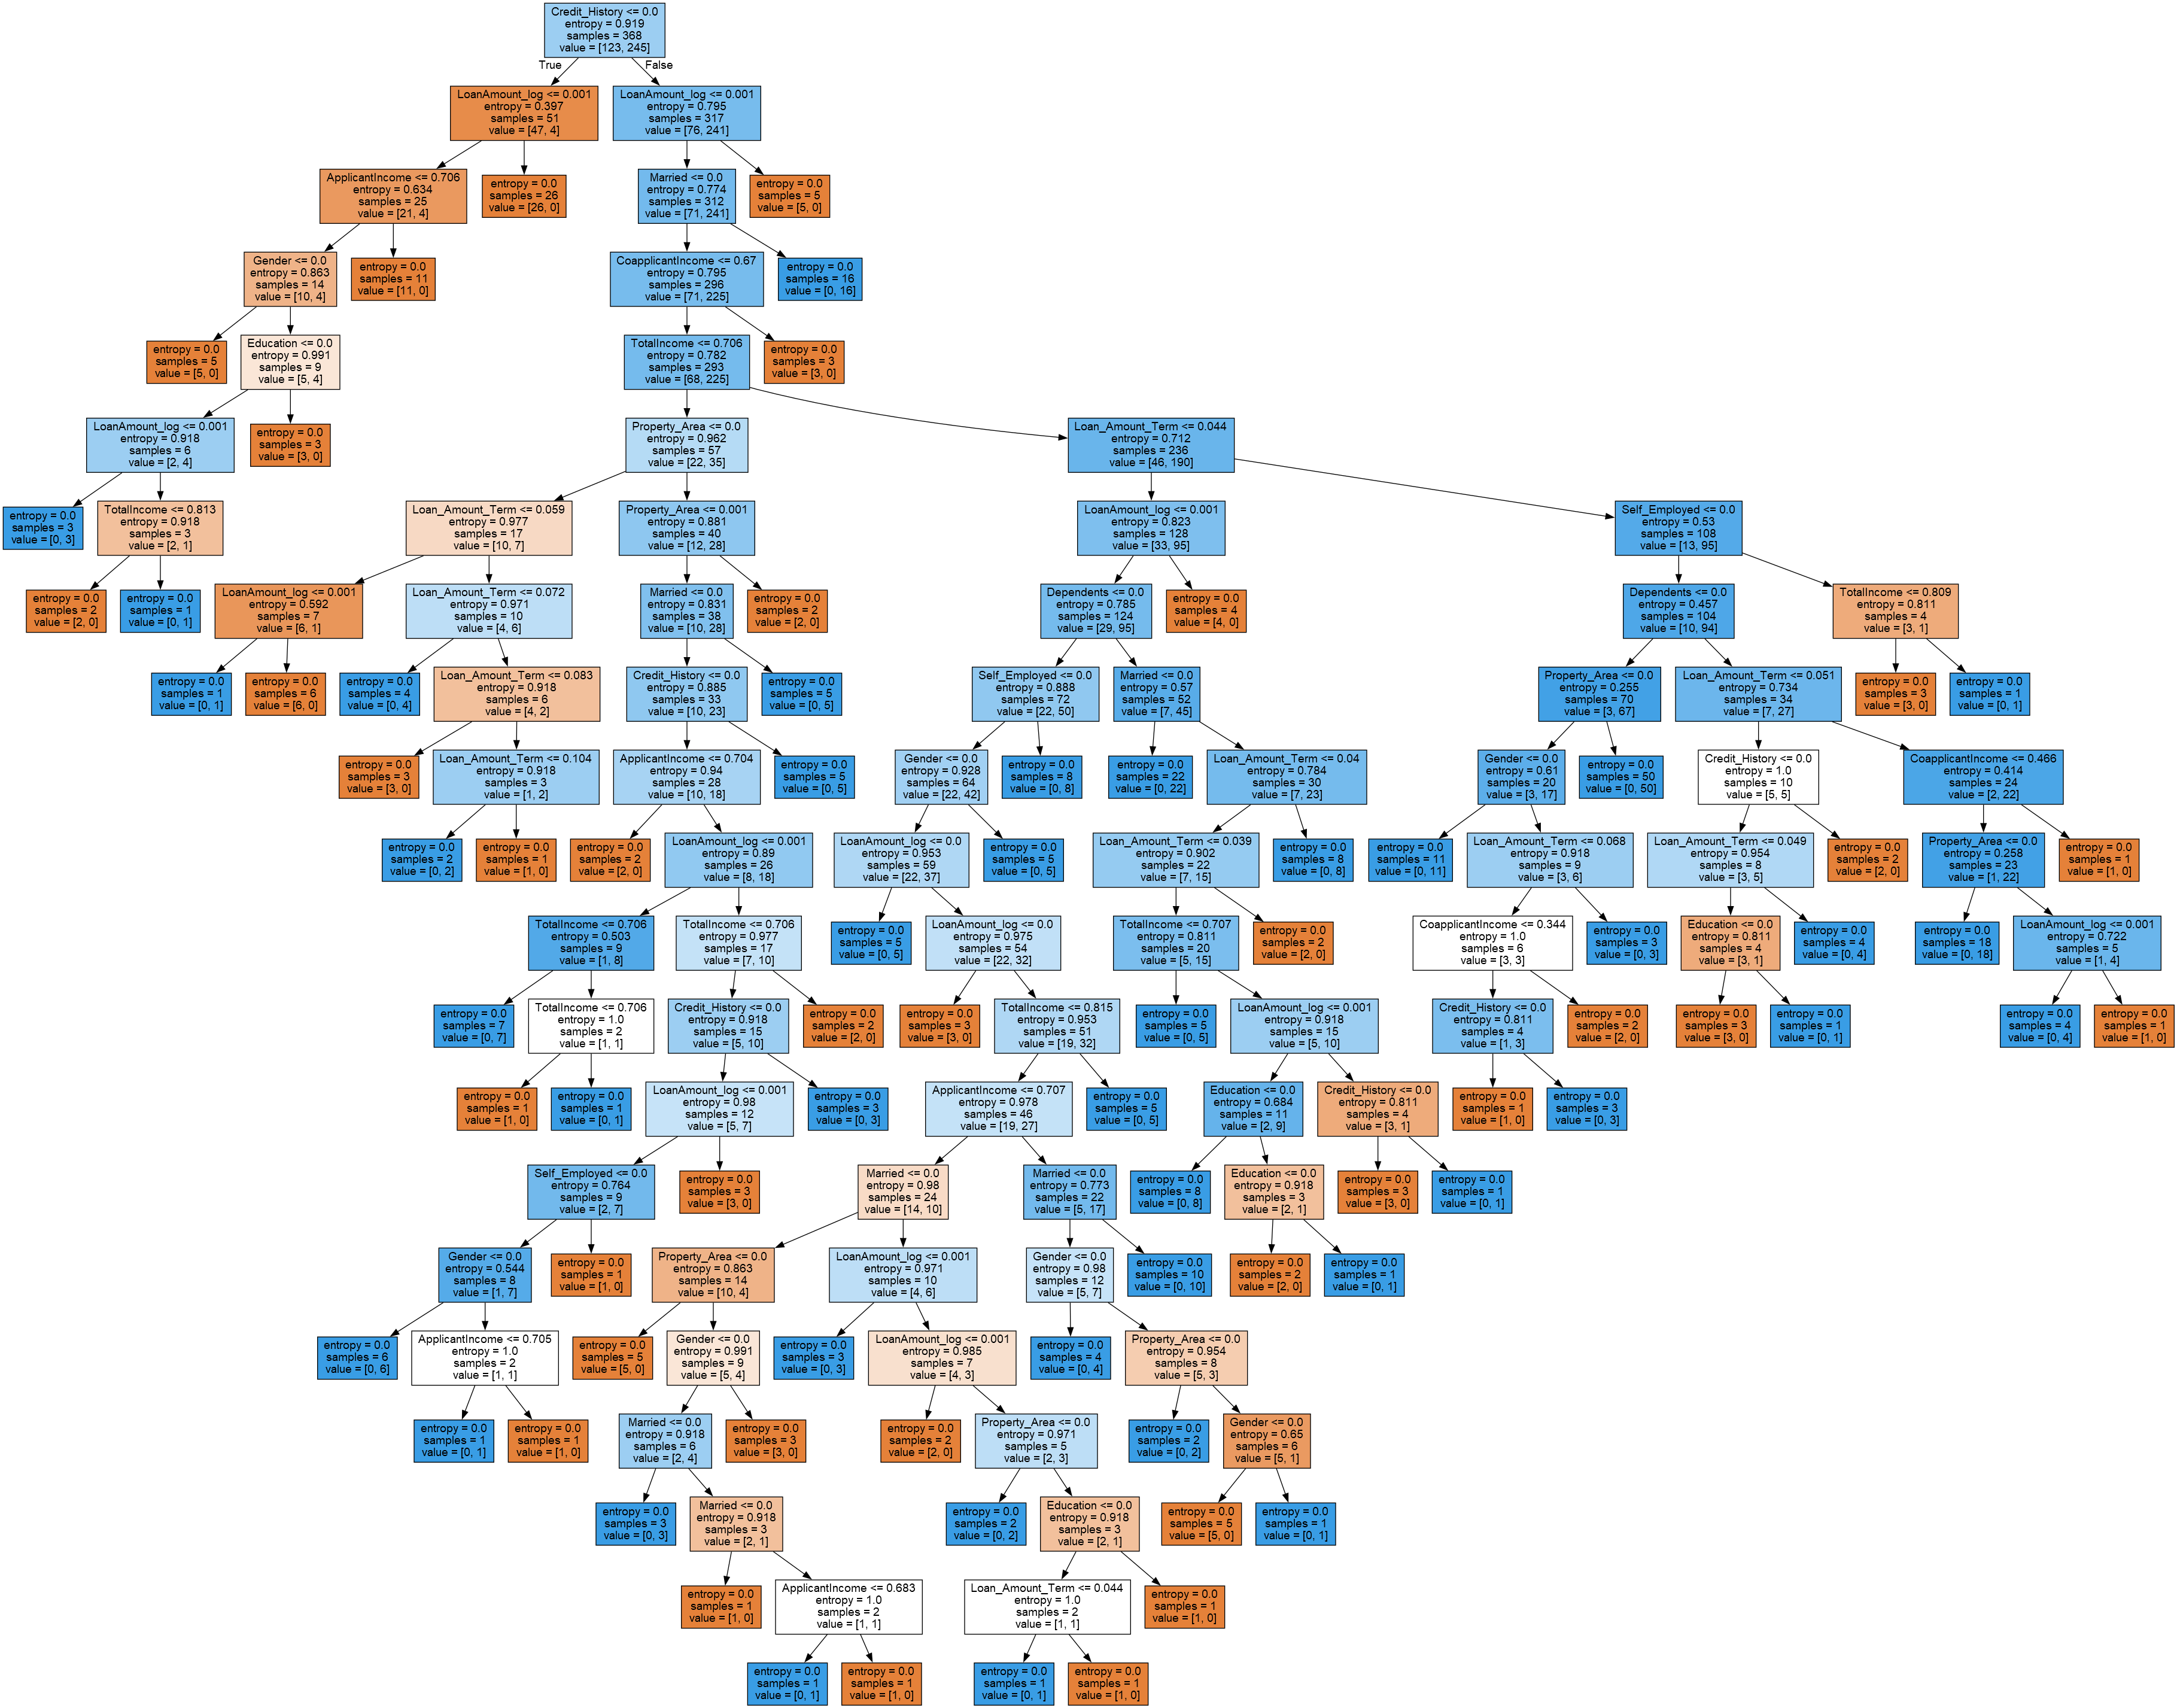

In [118]:
from cairosvg import svg2png
from IPython.display import Image
 
 
svg2png(bytestring=graph.pipe(format='svg'),write_to='output.png')
Image("output.png")

## Report

<AxesSubplot:>

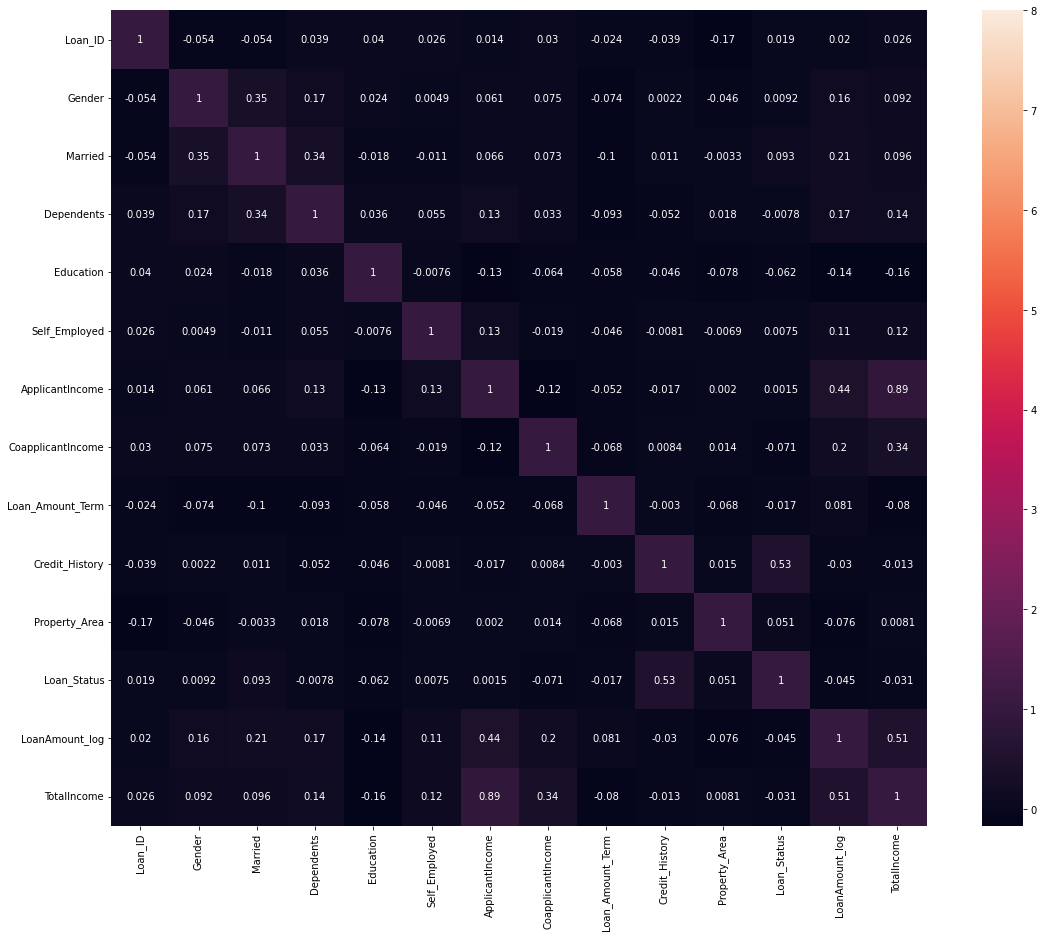

In [119]:
import seaborn as sns
matrix= data.corr()
fig,ax = plt.subplots(figsize=(20,15))
sns.heatmap(matrix, vmax= 8, square = True, annot= True)

To increase the performance of the model by choosing the important features i have choosen the top 6 features which are "Loan_Amount_log", "Credit_History", and "Co-applicant Income","Married","Education","Property Area".

In [123]:
features = normalized_data.drop(['Gender', 'TotalIncome','Self_Employed', 'Loan_Status','Loan_ID','Loan_Amount_Term','ApplicantIncome','Dependents'],axis=1)
 
classes = pd.DataFrame(normalized_data['Loan_Status'])

In [124]:
print('Features:')
print(features.head())
 
print('Classes:')
print(classes.head())

Features:
    Married  Education  CoapplicantIncome  Credit_History  Property_Area  \
0  0.000218        0.0           0.346632        0.000218       0.000218   
1  0.000000        0.0           0.000000        0.000243       0.000000   
2  0.000000        0.0           0.000000        0.000053       0.000107   
3  0.000111        0.0           0.231938        0.000111       0.000000   
4  0.000204        0.0           0.000000        0.000204       0.000204   

   LoanAmount_log  
0        0.000994  
1        0.001035  
2        0.000197  
3        0.000581  
4        0.000658  
Classes:
   Loan_Status
0            1
1            1
2            1
3            0
4            1


In [126]:
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size= .33, 
                                                    random_state = 65)
 
print(x_train.shape, x_test.shape)

(368, 6) (182, 6)


In [127]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [128]:
dtc_model = decisionTree.fit(x_train, y_train)

Feature: 0, Score: 0.12162
Feature: 1, Score: 0.03110
Feature: 2, Score: 0.15767
Feature: 3, Score: 0.37224
Feature: 4, Score: 0.08361
Feature: 5, Score: 0.23376


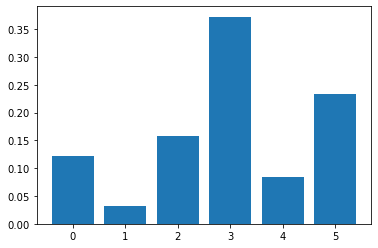

In [129]:
# feature importance
importance = dtc_model.feature_importances_
 
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
 
# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [130]:
prediction = dtc_model.predict(x_test) 

In [131]:
y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

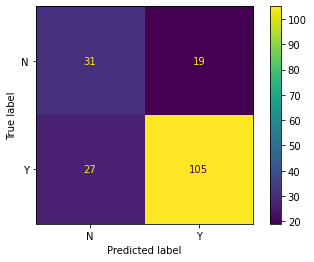

In [132]:
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [133]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.53      0.62      0.57        50
           Y       0.85      0.80      0.82       132

    accuracy                           0.75       182
   macro avg       0.69      0.71      0.70       182
weighted avg       0.76      0.75      0.75       182



In [136]:
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(dtc_model, out_file=None, feature_names=features.columns,filled=True))

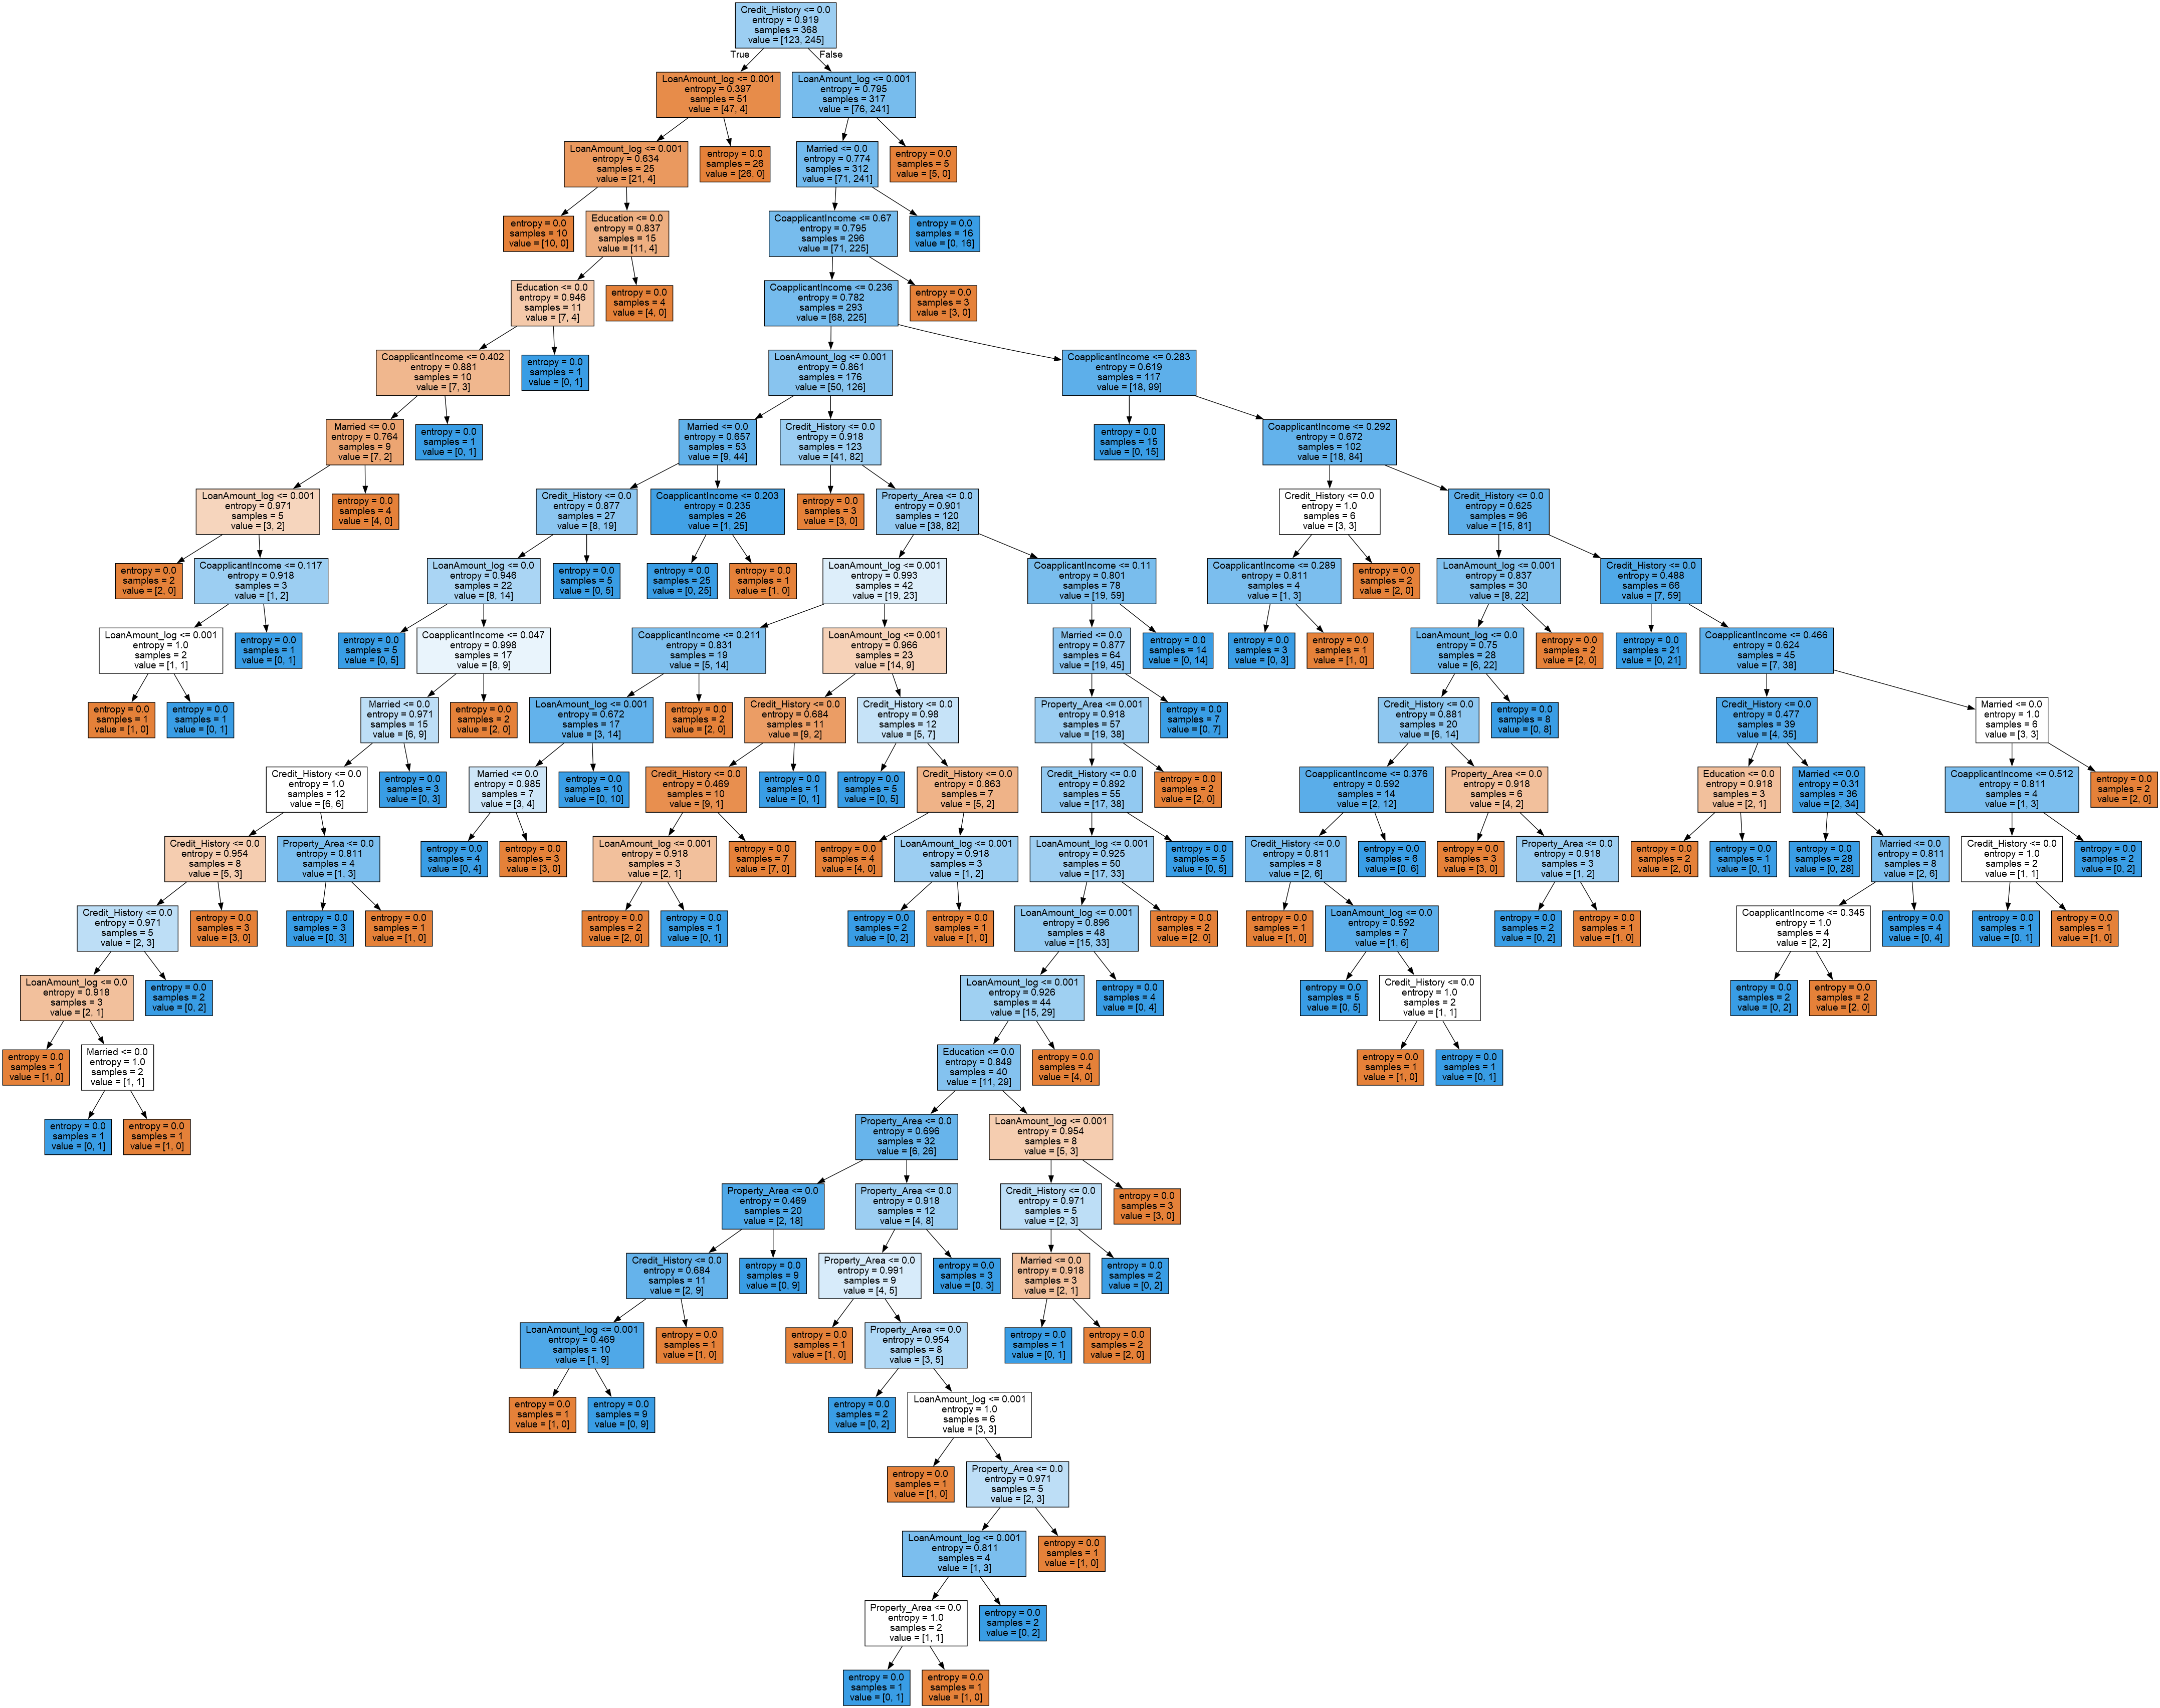

In [137]:
svg2png(bytestring=graph.pipe(format='svg'),write_to='output1.png')
Image("output1.png")

Q7. This is my answer 
- This decision tree model analyzes and explores features to help decide if an individual will be granted a loan when a loan application is submitted, and certain features influence this decision. The dataset originally had 11 features, but after pre-processing, we had the features for our decision tree model. Our baseline model included all the features in the dataset without the "Loan Status", which is the target variable, and "Loan ID," which is just a numerical feature of no significance.
- The goal of this analysis was to improve the model. The baseline model achieved an accuracy of 0.68, while the new model achieved an accuracy of 0.75. Both models used a set of selected features, the baseline used all the features ehile the new model used all the features that had high correlation with Loan Status.
- In addition to accuracy, the analysis also compared the precision and recall scores of the two models. The baseline model had a precision score of 0.83 and a recall score of 0.70, while the new model had a precision score of 0.85 and a recall score of 0.80. This model is better because it does not use as many features as the baseline model saving costs and getting spectacular results. 

 Q8.-Discuss the result based on the evaluation matrix 
: This is my answer
An evaluation matrix can be used to evaluate the performance of this model based on precision, recall, accuracy, and confusion.

- Precision measures the proportion of true positive predictions out of all the positive predictions made by the model. Here, the precision for 'N' is 0.53, meaning 53% of the predicted 'N', and 0.85 for predicted 'Y', was correct.

Recall measures the proportion of true positive predictions out of all actual positive cases. Here, the recall for 'N' is 0.62, meaning 62% of the actual 'N', and 0.80 for predicted 'Y' cases were correct.

F1-score is the harmonic mean of precision and recall, which gives a balanced measure of both. Here, the F1-score for 'N' is 0.57, and performance in predicting 'N' is moderate.

The support column represents the number of instances, there are 50 instances of 'N' and 132 instances of 'Y'.

The accuracy of the model is 0.75, which means that 75% of the instances were correctly predicted. However, accuracy can be misleading in imbalanced datasets, where one class has a much higher frequency than the other.

The macro-average is the average of the metrics for each class, where each class is given equal weight. In this case, the macro-average F1 score is 0.70, indicating that the model's overall performance is moderate.

The weighted average is weighted by the number of instances of each class. Here, the weighted-average F1-score is 0.75, which is the same as the overall accuracy, indicating that the model's performance is consistent across both classes.

 The confusion matrix shows the performance of the model at TP (105), TN (27), FP (19), and FN (31).

Overall, the model performed moderately well, with better performance in predicting 'Y' compared to 'N'. The evaluation metrics provide insights into the model's strengths and weaknesses, which can be used to improve the model's performance.

For our model, a high recall will be more desirable than a high precision because some customers who are able to pay back may be deemed defaulters and they might lose their customers, because this needs to be further evaluated by a human.

Loan Prediction using Decision trees 

Introduction 

Decision trees are a popular machine learning algorithm and they can handle both numerical and categorical features. This algorithm is mostly used by financial institutions to know if a loan applicant will default on a loan repayment or not.

Data Processing and Experimentation

In this report, data pre-processing was performed and all the null values were taken care of, but the dataset still had extreme values and outliers which affected the dataset and could be seen by the visualization of the box plots and histogram, to deal with these outliers and extreme values a log transform was implemented and the dataset looked better when visualizing. So many customers with the same income applied for a loan which tells us people in that class needed financial assistance.
Encoding and normalization processes were also performed on the dataset before building our baseline model with all the features present (N.B when we did a log transform of loan amount term, we added loan_amount_log to the dataset but dropped the loan amount term). 

A baseline model was built with all the features and the accuracy, precision, recall, and F1 score were seen but it would cost a whole lot in real life to use all the features present to build a model so we did a correlation of all the features in the dataset and picked out the highest correlation to loan status to build a new model to improve the model performance and accuracy, 6 features were picked and the model performed better.

Conclusion

This model is a very good way to predict a loan defaulter but at the end of the model, a human might just have to look at the results to see if the false negatives didn’t predict wrongly a customer that can afford to pay their loans back.
